# Fig1a (previous Fig1a)

In [21]:
from asyncio import current_task
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker


def plot1a(ax):
# 存储数据
    data_dict = {}
    current_T = None

    # 打开并读取数据文件
    with open("Fig1a/Fig1a_sub.txt", "r") as file:
        for line in file:
            numbers = line.split()
            if len(numbers) == 2:  # 新的行有T和n两个字段
                current_T = float(numbers[0])
                current_meth = numbers[1]
                current = (current_T,current_meth)
                if current not in data_dict:
                    data_dict[current] = {"t": [], "I_total": [], "I_ad": [], "I_sim": []}
            elif len(numbers) == 5 :
                data_dict[current]["t"].append(float(numbers[1]))
                data_dict[current]["I_total"].append(float(numbers[2]))
                data_dict[current]["I_ad"].append(float(numbers[3]))
                data_dict[current]["I_sim"].append(abs(float(numbers[4])))



    # 创建一个新的figure
    # fig, ax = plt.subplots(1, 1, figsize=(8*0.9, 6*0.9))

    # 绘图，设定颜色cmap
    colors = ["#F27873", '#FFD373', '#008A45', '#80C5A2', '#5F5F5E', '#468BCA', '#7DD2F6', '#B384BA', '#D9C2DD']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(colors))

    # 设置线的样式
    lmap = [':', '-.', '--', '-']
    # 不同的标记符号
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', '|', '_']

    labels = ['$\mathcal{I}$',r'$\mathcal{I}_{\text{ad}}$',r'$\mathcal{I}_{\text{sim}}$']

    # 设置全局字体属性
    plt.rcParams['font.size'] = 18  # 设置全局字体大小
    # 设置点的大小
    l_width = 5
    p_size = 100

    # 进行倒序，然后绘图
    for i, mykey in enumerate(sorted(data_dict.keys(), reverse=True)):
        data = data_dict[mykey]
        T, meth = mykey[0], mykey[1]
        if T == 50:
            ls = '-'
            name = '$T=50$,   '
        elif T == 200 :
            ls = '--'
            name = '$T=200$, '
        elif T == 500:
            ls = ':'
            name = '$T=500$, '
        if meth == 'sub':
            cl = cmap(0)
        else:
            cl = cmap(1)
        t = np.array(data["t"])
        I_total = np.array(data["I_total"])
        ax.plot(t, I_total, color=cl, linestyle=ls, lw=l_width,label = name +meth)
        # if meth == 'sub':
        #     I_total1 = []
        #     for k in range(len(t)):
        #         m = (t[k])**4*I_total[0]*10
        #         if m > 1:
        #             m = 1
        #         I_total1.append(m)
        #     ax.plot(t, I_total1, color=cmap(2), linestyle=ls, lw=l_width,label = name + ', '+'former')
        # ax.scatter(t, I_total, color=cmap(i), marker=markers[0], linestyle=lmap[i], s=p_size,label=labels[i]+' for Tro')
        # ax.plot(data[0], data_lcu[i + 1], color=cmap(i), linestyle='--', lw=l_width)
        # ax.scatter(data[0], data_lcu[i + 1], color=cmap(i), marker=markers[1], linestyle=lmap[i], s=p_size,label=labels[i]+' for LCU')

    a  = 0.00003
    # b = 0.005
    # c =  120
    Ts1 = np.linspace(0,50,1000) 
    Ts2 = np.linspace(0,250,10000) 
    Ts3 = np.linspace(0,500,10000) 
    ys1 = a * Ts1**2
    ys2 = a * Ts2**2
    ys3 = a * Ts3**2
    Ts= [Ts1,Ts2,Ts3]
    ys = [ys1,ys2,ys3]
    labels = ['$T=50$,   general','$T=200$, general','$T=500$, general']

    l_widthl = [9,6,3]
    color = [cmap(4),cmap(3),cmap(5)]
    lst = ['-','--',':']

    for i in range(len(labels)):
        ax.plot(Ts[i], ys[i], color=color[i], linestyle=lst[i], lw=l_widthl[i],label=labels[i])
        # ax.scatter(data[0], data[i + 1], color=cmap(i), marker=markers[0], linestyle=lmap[i], s=p_size,label=labels[i]+' for Tro')


    a1  = 0.00003
    a2 = 0.008
    a3 = 0.08
    # b = 0.005
    # c =  120
    Ts = np.linspace(50,500,1000) 
    ys1 = a1 * Ts**2
    ys2 = a2 * Ts / Ts
    ys3 = a3 * Ts**(-2)
    ys = [ys1,ys2,ys3]

    lst = ['-','--',':']

    for i in range(len(ys)):
        ax.plot(Ts, ys[i], color='black', linestyle='--', lw=3)

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([1E-9, 1])
    ax.set_xlim([1, 10000])
    # ax.legend(frameon=False)
    main_ticks_y = [1E-9,1E-6,1E-3,1]  # y轴主刻度位置
    ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
    main_ticks_x = [10,100,1000]  # y轴主刻度位置
    ax.xaxis.set_major_locator(ticker.FixedLocator(main_ticks_x))
    # 移除y轴的副刻度
    ax.yaxis.set_minor_locator(ticker.NullLocator())
    # ax.legend(frameon=False,fontsize = 18,bbox_to_anchor=(0.01, 0,1,1),  # (1, 0) 表示右下角
    #                     bbox_transform=ax.transAxes,
    #                     borderpad=0)


    # 获取句柄和标签
    handles, labels = ax.get_legend_handles_labels()

    # 分割句柄和标签以创建两个图例
    handles1, labels1 = [handles[i] for i in [5,3,1]], [labels[i] for i in [5,3,1]]  # 第一列，五行
    handles2, labels2 = [handles[i] for i in [4,2,0]], [labels[i] for i in [4,2,0]]  # 第二列，两行
    handles3, labels3 = [handles[i] for i in [6,7,8]], [labels[i] for i in [6,7,8]]  # 第二列，两行

    # # 分割句柄和标签以创建两个图例
    # handles1, labels1 = [handles[i] for i in [0,1,5]], [labels[i] for i in [0,1,5]]  # 第一列，五行
    # handles2, labels2 = [handles[i] for i in [2,3,4]], [labels[i] for i in [2,3,4]]  # 第二列，两行

    # # 创建第一列图例，放置在左下角
    legend1 = ax.legend(handles1+handles2, labels1+labels2, loc='lower left', bbox_to_anchor=(0.02, -0.01), ncol=2, frameon=False, fontsize = 15)

    # # 创建第二列图例，放置在第一列图例的右侧，通过调整 bbox_to_anchor 的值进行精确位置控制
    # # 注意：这里的 bbox_to_anchor 的值可能需要根据实际情况进行微调以获得最佳布局
    legend2 = ax.legend(handles3, labels3, loc='lower left', bbox_to_anchor=(0.49,0.75), ncol=1, frameon=False,fontsize = 15)

 

    # # 将第一个图例重新添加到图中，因为第二个图例的创建会覆盖第一个图例
    ax.add_artist(legend1)
    # legend3 = ax.legend(handles1, labels1, loc='lower left', bbox_to_anchor=(0.1, -0.01), ncol=1, frameon=False,fontsize = 15)
    # ax.add_artist(legend1)
    # ax.add_artist(legend2)
    # ax.legend(handles1+handles2+handles3, labels1+labels2+labels3, loc='upper right', bbox_to_anchor=(1.1, 0.97), ncol=1, frameon=False,fontsize = 16)

    ax.set_ylabel('Infidelity  $\mathcal{I}$', fontsize=18)
    ax.set_xlabel('t', fontsize=18)
    # ax.text(0.1, 0.97, '(a)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

    ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width = 2, length = 6)
    ax.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width = 1, length = 3)

    # 设置刻度标签的字体大小
    ax.tick_params(axis='both', which='major', labelsize=16)  # 设置主刻度标签的字体大小
    ax.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签的字体大小

   # # 添加标签
    ax.text(0.1, 0.97, '(a)', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    ax.text(0.4, 0.98, '$O(T^{2})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    ax.text(0.83, 0.77, '$O(T^0)$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    ax.text(0.87, 0.3, '$O(T^{-2})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    # 设置边框的粗细
    for a in [ax]:#, inset_ax1, inset_ax2]:
        for spine in a.spines.values():
            spine.set_linewidth(2)  # 设置边框的宽度

    # 保存图像
    plt.savefig('Fig1a/Fig1a.eps')
    # plt.show()
# # 创建一个新的figure
# fig, ax = plt.subplots(figsize=(10, 8))
# plot1a(ax)

# Fig1b (previous Fig1f)

In [22]:
# from asyncio import current_task
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.interpolate import interp1d
# from matplotlib.colors import LinearSegmentedColormap
# import matplotlib.ticker as ticker

# def plot1f(ax):

#     # 存储数据
#     data = [[],[],[],[]]

#     es = x = np.linspace(10,1E5, 400)
#     tro_sub = es
#     tro_pri = es**(1/2)
#     tro_before = es**(3/2)
#     lcu_td = 3/2*es**(1/2)*np.log(es)
#     # lcu_id = 3/2*es*np.log(es)
#     # lcu_our = es

#     data = [tro_before,tro_sub,lcu_td,tro_pri]
#     # mylabels = ['$\epsilon^{-3/2}$',r'$\frac{3}{2}\epsilon^{-1}\ln(\epsilon^{-1})$','$\epsilon^{-1}$','$\epsilon^{-1/2}$']
#     # mylabels = ['$O(\epsilon^{-3/2})$',r'$O(\frac{3}{2}\epsilon^{-1}\ln(\epsilon^{-1}))$','$O(\epsilon^{-1})$','$O(\epsilon^{-1/2})$']
#     mylabels = ['Trotter, general','Trotter, this work',"LCU, general",  'LCU, this work']

#     # 创建一个新的figure
#     # fig, ax = plt.subplots(1, 1, figsize=(8*0.9, 6*0.9))

#     # 绘图，设定颜色cmap
#     colors = ["#F27873", '#FFD373', '#008A45', '#80C5A2', '#5F5F5E', '#468BCA', '#7DD2F6', '#B384BA', '#D9C2DD']
#     cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(colors))

#     # 设置线的样式
#     lmap = [':', '-.', '--', '-']
#     # 不同的标记符号
#     markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', '|', '_']

#     labels = ['$\mathcal{I}$',r'$\mathcal{I}_{\text{ad}}$',r'$\mathcal{I}_{\text{sim}}$']

#     # 设置全局字体属性
#     plt.rcParams['font.size'] = 18  # 设置全局字体大小
#     # 设置点的大小
#     l_width = 3
#     p_size = 100

#     # 绘制第一个子图
#     for i in range(len(data)):
#         ax.plot(es, data[i], color=cmap(i), linestyle=lmap[i], lw=l_width,label = mylabels[i])
#         # ax.scatter(data[0], data[i + 1], color=cmap(i), marker=markers[0], linestyle=lmap[i], s=p_size,label=labels[i]+' for Tro')
#         # ax.plot(data[0], data_lcu[i + 1], color=cmap(i), linestyle='--', lw=l_width)
#         # ax.scatter(data[0], data_lcu[i + 1], color=cmap(i), marker=markers[1], linestyle=lmap[i], s=p_size,label=labels[i]+' for LCU')


#     ax.set_yscale('log')
#     ax.set_xscale('log')
#     # ax.set_ylim([1E-7, 1])
#     # ax.set_xlim([1, 700])
#     # ax.set_ylim([1E-9,1])
#     main_ticks_y = [10,1E4,1E7]  # y轴主刻度位置
#     ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
#     # 移除y轴的副刻度
#     ax.yaxis.set_minor_locator(ticker.NullLocator())

#     ax.legend(frameon=False)

#     ax.set_ylabel('Circuit depth $d$',fontsize = 18)
#     ax.set_xlabel('$\epsilon^{-1}$',fontsize = 18)
#     # ax.text(0.1, 0.97, '(a)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

#     ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width = 2, length = 6)
#     ax.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width = 1, length = 3)

#     # 设置刻度标签的字体大小
#     ax.tick_params(axis='both', which='major', labelsize=16)  # 设置主刻度标签的字体大小
#     ax.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签的字体大小

#     ax.text(0.97, 0.1, '(b)', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
#     # mylabels = ['$O(\epsilon^{-3/2})$',r'$O(\frac{3}{2}\epsilon^{-1}\ln(\epsilon^{-1}))$','$O(\epsilon^{-1})$','$O(\epsilon^{-1/2})$']
#     ax.text(0.83, 0.89, '$O(\epsilon^{-3/2})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
#     ax.text(0.99, 0.37, r'$\widetilde{O}(\frac{3}{2}\epsilon^{-\frac{1}{2}}\ln(\epsilon^{-1}))$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
#     ax.text(0.8, 0.6, '$O(\epsilon^{-1})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
#     ax.text(0.83, 0.2, '$O(\epsilon^{-1/2})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    

#     # 设置边框的粗细
#     for a in [ax]:#, inset_ax1, inset_ax2]:
#         for spine in a.spines.values():
#             spine.set_linewidth(2)  # 设置边框的宽度

#     # 保存图像
#     plt.savefig('Fig1f/Fig1f.eps')
#     plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

def plot1b(ax):
    """
    在一个给定的Axes对象(ax)的区域内，创建一个上下堆叠、共享X轴的子图。
    """
    # --- 修正之处：使用 get_subplotspec() 而不是 get_gridspec() ---
    subplot_spec = ax.get_subplotspec()
    # ---------------------------------------------------------

    # 在该位置上创建一个2行1列的新网格
    inner_gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=subplot_spec, hspace=0.1)
    
    # 隐藏原始的ax，因为它现在只是一个容器
    ax.set_visible(False)

    # 在新网格上创建两个子图
    fig = ax.get_figure()
    ax1 = fig.add_subplot(inner_gs[0])  # 上方的图 (Trotter)
    ax2 = fig.add_subplot(inner_gs[1], sharex=ax1) # 下方的图 (Dyson/GQSP), 共享X轴

    # --- 数据定义 ---
    es = np.linspace(10, 1E5, 400)
    trotter_general = es**(3/2)
    trotter_this_work = es
    t = 1
    dyson = t + np.log(es)
    gqsp = np.full_like(es, t)

    # --- 颜色和样式 ---
    colors = ["#8ea5cc",  '#a57eb6', '#f6d378', '#f3bbb1']
    lmap = [':', '-.', '--', '-']
    l_width = 5

    # --- 绘制上半部分：Trotter (ax1) ---
    ax1.plot(es, trotter_general, color=colors[0], linestyle=lmap[0], lw=l_width, label='Trotter / QDrift')
    ax1.plot(es, trotter_this_work, color=colors[1], linestyle=lmap[1], lw=l_width, label='Trotter (This work)')
    ax1.set_yscale('log')
    ax1.set_ylabel('Query complexity \n(log scale)', fontsize=16)
    ax1.legend(loc='upper left', frameon=False, fontsize=14)
    ax1.text(0.83, 0.89, '$O(\epsilon^{-3/2})$', transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    ax1.text(0.8, 0.6, '$O(\epsilon^{-1})$', transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    ax2.text(0.91, 0.18, '(c)', transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')


    # --- 绘制下半部分：Dyson/GQSP (ax2) ---
    ax2.plot(es, dyson, color=colors[2], linestyle=lmap[2], lw=l_width, label='Dyson / Qubitization')
    ax2.plot(es, gqsp, color=colors[3], linestyle=lmap[3], lw=l_width, label='GQSP (This work)')
    ax2.set_yscale('linear')
    ax2.set_ylabel('Auxiliary qubits\n(linear scale)', fontsize=16)
    ax2.set_ylim([0,15])
    ax2.legend(loc='upper left', frameon=False, fontsize=14)
    ax2.text(0.93, 0.89, '$\widetilde{O}(L+\log(\epsilon^{-1}))$', transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    ax2.text(0.66, 0.2, '$O(L)$', transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    ax2.text(0.91, 0.18, '(d)', transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

    # --- 统一格式设置 ---
    # 由于sharex=True，ax1的x轴刻度标签自动隐藏
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    for sub_ax in [ax1, ax2]:
        sub_ax.set_xscale('log')
        null_formatter = ticker.NullFormatter()
        sub_ax.yaxis.set_major_formatter(null_formatter)
        sub_ax.yaxis.set_minor_formatter(null_formatter)
        sub_ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width=2, length=6)
        sub_ax.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width=1, length=3)
        for spine in sub_ax.spines.values():
            spine.set_linewidth(2)
            
    ax2.set_xlabel('$\epsilon^{-1}$ (log scale)', fontsize=18)
    ax2.xaxis.set_major_formatter(ticker.NullFormatter())
    ax2.xaxis.set_minor_formatter(ticker.NullFormatter())


# --- 主程序部分 ---
# 设置全局字体
plt.rcParams['font.size'] = 18

# # 创建一个新的figure
# fig, ax = plt.subplots(figsize=(10, 8))
# plot1b(ax)

## Fig1c

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker


def plot1c(ax):
    # --- MODIFICATION: Updated data loading logic ---
    data_dict = {}
    current_n = None
    with open("Fig1c/Fig1c.txt", "r") as file:
        for line in file:
            line = line.strip()
            if not line: continue
            if line.startswith('n ='):
                current_n = int(line.split('=')[1].strip())
                data_dict[current_n] = {'g': [], 'tbr': []}
            elif current_n is not None:
                numbers = line.split()
                if len(numbers) >= 7:
                    data_dict[current_n]['g'].append(float(numbers[0]))
                    data_dict[current_n]['tbr'].append(float(numbers[2]))

    # --- Plotting --- (Styling from your provided code)
    colors = ["#F27873", '#FFD373', '#008A45', '#80C5A2', "#AAA7D0", '#468BCA', '#7DD2F6', '#B384BA', '#D9C2DD']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(colors))
    markers = ['x', 'o', 's', '^', 'D'] # Different markers for each n
    plt.rcParams['font.size'] = 18
    p_size = 12 

    # --- MODIFICATION: Loop to plot each 'n' group ---
    for i, n_val in enumerate(sorted(data_dict.keys())):
        data = data_dict[n_val]
        g_np = np.array(data['g'])
        y_axis_ratio = np.array(data['tbr'])
        x_axis_1_over_g = 1 / g_np
        
        ax.plot(x_axis_1_over_g, y_axis_ratio, 
                color=cmap(i + 4),  # Use a different color for each n
                linestyle='none',
                marker=markers[i % len(markers)], # Use a different marker for each n
                markersize=p_size,
                markeredgewidth=4,
                markerfacecolor='none',
                label=f'n = {n_val}') # Dynamic label for the legend

    # --- Axes and Ticks Configuration --- (As in your code)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([1E4, 1E7]) # Expanded ylim slightly to accommodate n=5 data
    ax.set_xlim([9, 110])

    # Legend location as you specified
    ax.legend(frameon=False, fontsize=15, loc=[0.06, 0.7]) # Adjusted y-position slightly for better look

    main_ticks_y = [1e4, 1e5, 1e6, 1e7]
    ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
    # This line was commented out in your code, keeping it that way
    # ax.yaxis.set_major_formatter(ticker.LogFormatter(10, labelOnlyBase=False))

    main_ticks_x = [10, 20, 40, 60, 80, 100]
    ax.xaxis.set_major_locator(ticker.FixedLocator(main_ticks_x))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(ticker.NullLocator())

    # --- Labels and Text --- (As in your code)
    ax.set_ylabel('$\eta$ (log scale)', fontsize=18)
    ax.set_xlabel('$g_{min}^{-1}$ (log scale)', fontsize=18)
    ax.text(0.86, 0.08, '(b)', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

    # --- Final Styling --- (As in your code)
    ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width=2, length=6)
    ax.tick_params(axis="y", direction="in", which="minor", top=True, right=True, width=1, length=3)
    ax.tick_params(axis='both', which='major', labelsize=16)
    
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    # Save the figure
    plt.savefig('Fig1c/Fig1c_multi_n_styled.eps', format='eps')
    print("Plot saved to Fig1c/Fig1c_multi_n_styled.eps")

# ==============================================================================
#                      MAIN SCRIPT TO RUN THE PLOT
# ==============================================================================
# fig, main_ax = plt.subplots(figsize=(8, 6))
# plot1c(main_ax)
# plt.show()

# Merge Fig1

Plot saved to Fig1c/Fig1c_multi_n_styled.eps


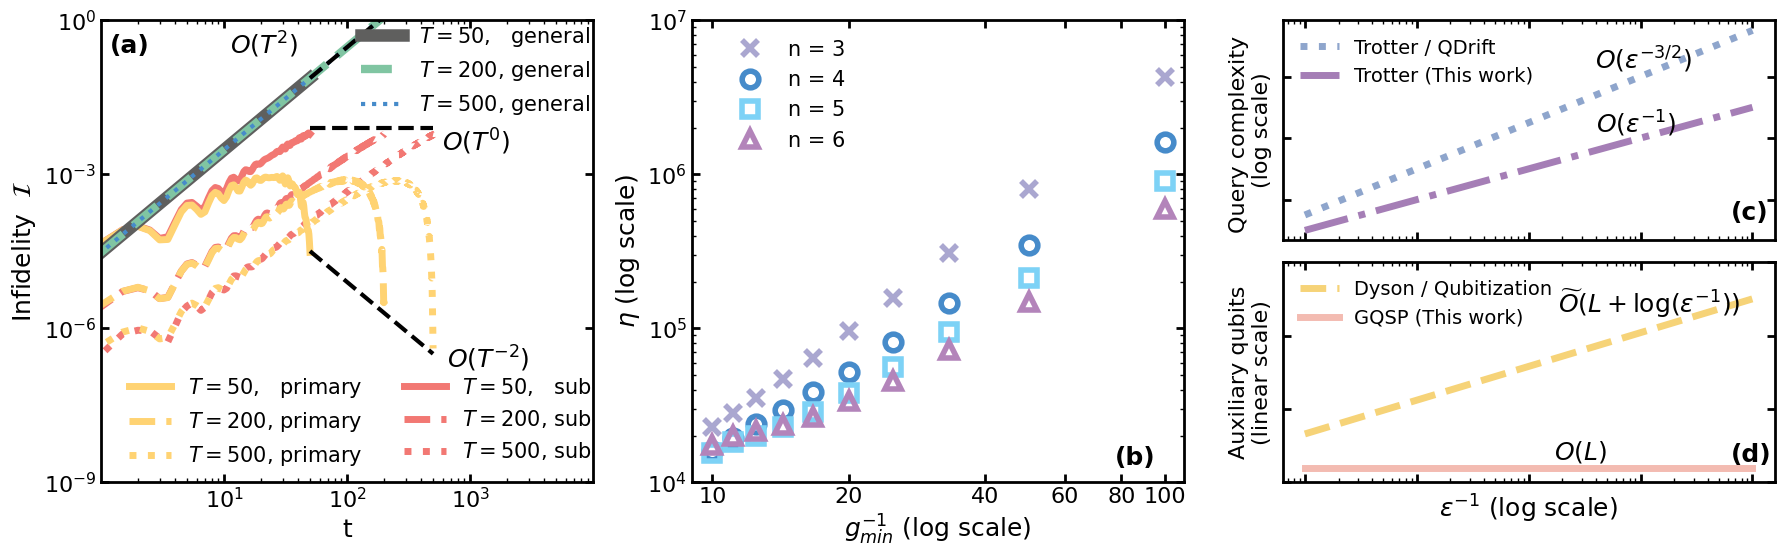

In [25]:
r = 1.2
# 创建一个2x3的子图大图
fig, axs = plt.subplots(1, 3, figsize=(18*r, 5*r))

# 调用每个绘图函数
plot1a(axs[0])
plot1b(axs[2])
plot1c(axs[1])


# 调整子图之间的间距
plt.subplots_adjust(wspace=0.2, hspace=0.15)
plt.savefig('Fig1/Fig1.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
# 显示拼接后的大图
plt.show()

# Fig2a (previous Fig1b)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

def plot2a(ax):

    # 存储数据
    data = [[], [], [], []]
    data_lcu = [[], [], [], []]

    # 打开并读取数据文件
    with open("Fig2a/Fig2a.txt", "r") as file:
        for line in file:
            numbers = line.split()
            data[0].append(float(numbers[0]))
            data[1].append(float(numbers[1]))
            data[2].append((float(numbers[2])))
            data[3].append((float(numbers[3])))
    # 创建一个新的figure
    # fig, ax = plt.subplots(1, 1, figsize=(8*0.9, 6*0.9))

    # 绘图，设定颜色cmap
    colors = ["#F27873",'#FFD373','#008A45','#468BCA','#7DD2F6','#B384BA','#D9C2DD','#80C5A2']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(colors))

    # 设置线的样式
    lmap = [':', '-.', '--', '-']
    # 不同的标记符号
    markers = ['+', 'x','o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H',  '|', '_']

    labels = ['$\mathcal{I}$',r'$\mathcal{I}_{\text{ad}}$',r'$\mathcal{I}_{\text{sim}}$']

    # 设置全局字体属性
    plt.rcParams['font.size'] = 18  # 设置全局字体大小
    # 设置点的大小
    l_width = 3
    p_size = 13

    # 绘制第一个子图
    for i in range(3):
        ax.plot(data[0], data[i + 1], color=cmap(i),markerfacecolor='none', marker=markers[i], markersize = p_size,markeredgewidth = 4, linestyle='-', lw=0,label=labels[i])


    a = data[3][0]
    T0 = data[0][0]
    kpri = a * T0**2
    ksub = a
    kbefore = a / T0/T0
    Ts = np.array(data[0]) 
    pri = kpri / Ts/Ts
    sub = ksub *Ts / Ts
    before =  kbefore * Ts * Ts
    data = [Ts,pri,sub,before]
    labels = ['$O(T^{-2})$','$O(T^{0})$','$O(T^{2})$']

    l_width = 5

    for i in range(3):
        ax.plot(data[0], data[i + 1], color='black', linestyle=lmap[i], lw=l_width,label=labels[i])
        # ax.scatter(data[0], data[i + 1], color=cmap(i), marker=markers[0], linestyle=lmap[i], s=p_size,label=labels[i]+' for Tro')


    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([1E-9,1])
    main_ticks_y = [1E-9,1E-6,1E-3,1]  # y轴主刻度位置
    ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
    # 移除y轴的副刻度
    ax.yaxis.set_minor_locator(ticker.NullLocator())
    ax.legend(frameon=False,fontsize = 18,bbox_to_anchor=(0.01, -0.03,1,1),  # (1, 0) 表示右下角
                        bbox_transform=ax.transAxes,
                        borderpad=0)

    ax.set_ylabel('Infidelity  $\mathcal{I}$')
    ax.set_xlabel('T')
    # ax.text(0.1, 0.97, '(a)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

    ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width = 2, length = 6)
    ax.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width = 1, length = 3)

    # 设置刻度标签的字体大小
    ax.tick_params(axis='both', which='major', labelsize=16)  # 设置主刻度标签的字体大小
    ax.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签的字体大小

   # # 添加标签
    ax.text(0.1, 0.97, '(a)', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    # 设置边框的粗细
    for a in [ax]:#, inset_ax1, inset_ax2]:
        for spine in a.spines.values():
            spine.set_linewidth(2)  # 设置边框的宽度

    # 保存图像
    plt.savefig('Fig2a/Fig2a.eps')
    # plt.show()

# # 创建一个新的figure
# fig, ax = plt.subplots(figsize=(10, 8))
# plot2a(ax)

# Fig2b (previous Fig1c)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

def plot2b(ax):

    # 存储数据
    data = [[], [], [], []]
    data_lcu = [[], [], [], []]

    # 打开并读取数据文件
    with open("Fig2b/delta_tro.txt", "r") as file:
        for line in file:
            numbers = line.split()
            data[0].append(float(numbers[0]))
            data[1].append(float(numbers[2]))
            data[2].append((float(numbers[4])))
            data[3].append((float(numbers[3])))

    with open("Fig2b/delta_tro_pri.txt", "r") as file:
        for line in file:
            numbers = line.split()
            data_lcu[0].append(float(numbers[0]))
            data_lcu[1].append(float(numbers[2]))
            data_lcu[2].append((float(numbers[4])))
            data_lcu[3].append((float(numbers[3])))

    # 创建一个新的figure
    # fig, ax = plt.subplots(1, 1, figsize=(8*0.9, 6*0.9))

    # 绘图，设定颜色cmap
    colors = ["#F27873",'#FFD373','#008A45',"#3480A3","#635C5FB1",'#7DD2F6','#B384BA','#D9C2DD']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(colors))

    # 设置线的样式
    lmap = [':', '--', '-.', '-']
    # 不同的标记符号
    markers = ['H', '+', 'x', '^','o', 's', 'D',  'v', '<', '>', 'p','|', '*', 'h',  '_']



    labels = ['$\mathcal{I}$, sub',r'$\mathcal{I}_{\text{sim}}$, sub','$\mathcal{I}$, primary',r'$\mathcal{I}_{\text{sim}}$, primary',r'$\mathcal{I}_{\text{ad}}$']

    # 设置全局字体属性
    plt.rcParams['font.size'] = 18  # 设置全局字体大小
    # 设置点的大小
    l_width = 3
    p_size = 15

    data = data[0:3] +data_lcu[1::]

    k = -4
    
    apri = data[4][k]
    asub = data[2][k]
    dt = data[0][k]
    kpri = apri /dt**2
    ksub = asub /dt**2
    dts = np.array(data[0]) 
    pri = kpri * dts **2 
    sub = ksub * dts **2 
    data1 = [dts,pri,sub]
    labels1 = ['$O(T^{-2}\delta t^2)$','$O(\delta t^2)$']

    # ax.legend(frameon=False,  loc = 'lower left')

    l_width = 5

    for i in range(2):
        ax.plot(data1[0], data1[i + 1], color='black', linestyle=lmap[i], lw=l_width,label=labels1[i])
        # ax.scatter(data[0], data[i + 1], color=cmap(i), marker=markers[0], linestyle=lmap[i], s=p_size,label=labels[i]+' for Tro')

    # 绘制第一个子图
    for i in range(len(data)-1):
        ax.plot(data[0], data[i + 1], color=cmap(i),markerfacecolor='none', marker=markers[i], markersize = p_size,markeredgewidth = 4, linestyle='-', lw=0,label=labels[i])






    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(20,0.05)
    ax.set_ylim(1E-9,1)
    main_ticks_y = [1E-9,1E-6,1E-3,1]  # y轴主刻度位置
    ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
    # 移除y轴的副刻度
    ax.yaxis.set_minor_locator(ticker.NullLocator())
    # ax.legend(frameon=False)#, loc = 'lower right')
    # plt.gca().add_artist(l1)

    # 获取句柄和标签
    handles, labels = ax.get_legend_handles_labels()


    # 分割句柄和标签以创建两个图例
    handles1, labels1 = [handles[i] for i in [5,4,3,2]], [labels[i] for i in [5,4,3,2]]  # 第一列，五行
    handles2, labels2 = [handles[i] for i in [6,0,1]], [labels[i] for i in [6,0,1]]  # 第二列，两行

    # # 分割句柄和标签以创建两个图例
    # handles1, labels1 = handles[:5], labels[:5]  # 第一列，五行
    # handles2, labels2 = handles[5:], labels[5:]  # 第二列，两行

    # 创建第一列图例，放置在左下角
    legend1 = ax.legend(handles1, labels1, loc='lower left', bbox_to_anchor=(-0.03, -0.01), ncol=1, frameon=False)

    # 创建第二列图例，放置在第一列图例的右侧，通过调整 bbox_to_anchor 的值进行精确位置控制
    # 注意：这里的 bbox_to_anchor 的值可能需要根据实际情况进行微调以获得最佳布局
    legend2 = ax.legend(handles2, labels2, loc='lower left', bbox_to_anchor=(0.4, -0.02), ncol=1, frameon=False)

    # 将第一个图例重新添加到图中，因为第二个图例的创建会覆盖第一个图例
    ax.add_artist(legend1)

    # # 添加图例，设置图例在左下角，第一列五行，第二列两行
    # handles, labels = ax.get_legend_handles_labels()
    # k = 5
    # new_handles = handles[:k]  + handles[k:]
    # new_labels = labels[:k] + labels[k:]
    # ax.legend(new_handles, new_labels, loc='lower left', bbox_to_anchor=(0, 0), ncol=2, frameon=False)

    ax.set_ylabel('Infidelity  $\mathcal{I}$')
    ax.set_xlabel('$\delta t$')
    # ax.text(0.1, 0.97, '(a)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

    ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width = 2, length = 6)
    ax.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width = 1, length = 3)

    # 设置刻度标签的字体大小
    ax.tick_params(axis='both', which='major', labelsize=16)  # 设置主刻度标签的字体大小
    ax.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签的字体大小

    ax.text(0.97, 0.1, '(b)', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    # 设置边框的粗细
    for a in [ax]:#, inset_ax1, inset_ax2]:
        for spine in a.spines.values():
            spine.set_linewidth(2)  # 设置边框的宽度

    # 保存图像
    plt.savefig('Fig2b/Fig2b.eps')
    # plt.show()
# # 创建一个新的figure
# fig, ax = plt.subplots(figsize=(10, 8))
# plot2b(ax)

# Fig2c (previous Fig1d)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker



# 定义拟合函数，在对数空间中
def log_fit_func(log_T, a, b):
    T = np.exp(log_T)
    return np.log(a * T**2 + b * T**-2)

def plot2c(ax):
    # 存储数据
    data_dict = {}
    current_T = None
    current_n = None

    # 打开并读取数据文件
    with open("Fig2c/Fig2c113.txt", "r") as file:
        for line in file:
            numbers = line.split()
            if len(numbers) == 2:  # 新的行有T和n两个字段
                current_T = float(numbers[0])
                current_n = int(numbers[1])
                if current_n not in data_dict:
                    data_dict[current_n] = {"T": [], "I_total": [], "I_ad": [], "I_sim": []}
            elif len(numbers) == 3 and current_T is not None and current_n is not None: 
                data_dict[current_n]["T"].append(current_T)
                data_dict[current_n]["I_total"].append(float(numbers[0]))
                data_dict[current_n]["I_ad"].append(float(numbers[1]))
                data_dict[current_n]["I_sim"].append(abs(float(numbers[2])))

    # 创建一个新的figure
    # fig, ax = plt.subplots(figsize=(10, 8))
    # 设置全局字体属性
    plt.rcParams['font.size'] = 18  # 设置全局字体大小

    # 绘图，设定颜色cmap
    colors = ["#F27873",'#FFD373','#008A45','#80C5A2','#5F5F5E','#468BCA','#7DD2F6','#B384BA','#D9C2DD']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(data_dict))

    # 设置点的大小
    p_size = 70
    l_size = 3

    min_values = []

    # 不同的标记符号
    markers = ['o', 's', 'D', '^', 'v', '<', '>', '+', 'p', '*', 'h', 'H','x',  '|', '_']

    # 进行倒序，然后绘图
    for i, n in enumerate(sorted(data_dict.keys(), reverse=True)):
        data = data_dict[n]
        T = np.array(data["T"])
        I_total = np.array(data["I_total"])
        
        # 对数据进行对数变换
        log_T = np.log(T)
        log_I_total = np.log(I_total)
        
        # 设置初始参数和参数范围
        initial_params = [1, 1]
        param_bounds = ([0, 0], [np.inf, np.inf])
        
        # 拟合曲线
        try:
            popt, pcov = curve_fit(log_fit_func, log_T, log_I_total, p0=initial_params, bounds=param_bounds)
            T_new = np.linspace(min(T), max(T), num=1000)
            log_T_new = np.log(T_new)
            log_I_total_new = log_fit_func(log_T_new, *popt)
            I_total_new = np.exp(log_I_total_new)
        
            # 找到最小值点
            min_index = np.argmin(I_total_new)
            min_T = T_new[min_index]
            min_I_total = I_total_new[min_index]
            
            min_values.append((n, min_T))
            
            # 绘制原始数据和拟合曲线
            ax.plot(T_new, I_total_new, color=cmap(i), lw=l_size,linestyle = '--')
            ax.scatter(T, I_total, color=cmap(i), s=p_size, marker=markers[i % len(markers)], label=f"r={n}")
            # ax.scatter(min_T, min_I_total, color=cmap(i), s=p_size*2, marker=markers[i % len(markers)])
        except RuntimeError:
            print(f"Fit failed for r={n}")

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([3, 800])
    ax.set_ylim([0.0003, 0.1])
    ax.legend(frameon=False, loc='upper right',fontsize = 18, bbox_to_anchor=(0.0045, 0,1,1),bbox_transform=ax.transAxes,borderpad=0)
    ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width=2, length=6)
    ax.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width=1, length=3)
    ax.set_ylabel('Infidelity $\mathcal{I}$')
    ax.set_xlabel('$T$')
    # 设置边框的粗细
    for spine in ax.spines.values():
        spine.set_linewidth(2)  # 设置边框的宽度
    # 设置刻度标签的字体大小
    ax.tick_params(axis='both', which='major', labelsize=18)  # 设置主刻度标签的字体大小
    ax.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签的字体大小

    # 绘制最小值点与 sqrt(n) 的关系
    n_values = np.array([x[0] for x in min_values])
    sqrt_n_values = np.sqrt(n_values)
    min_T_values = np.array([x[1] for x in min_values])

    # 定义线性函数用于拟合
    def linear_func(x, a, b):
        return a * x + b

    # 进行线性拟合
    params, covariance = curve_fit(linear_func, sqrt_n_values, min_T_values)
    slope, intercept = params

    # 输出斜率
    print(f"斜率: {slope:.2f}")

    # 绘制拟合直线
    fit_line = linear_func(sqrt_n_values, slope, intercept)

    # 创建内嵌子图，使用 bbox_to_anchor 参数来精细调整位置
    ax_inset = inset_axes(ax, width="30%", height="30%", 
                        bbox_to_anchor=(-0.55, -0.03,1,1),  # (1, 0) 表示右下角
                        bbox_transform=ax.transAxes,
                        borderpad=0)  # borderpad 设置为0

    ax_inset.scatter(sqrt_n_values, min_T_values, color='#84BA42', label='$T_c$', s=50, marker='x')
    ax_inset.plot(sqrt_n_values, fit_line, color='#682487', label='Fit', lw=3)
    # 设置标签和标题
    ax_inset.set_xlabel(r'$\sqrt{r}$',fontsize=16)
    ax_inset.set_ylabel('$T_c$',fontsize=16)
    ax_inset.set_xticks(range(10, 23, 5))
    ax_inset.set_yticks(range(10, 36, 5))
    main_ticks_y = [10,20,30]  # y轴主刻度位置
    ax_inset.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
    ax_inset.tick_params(axis="both", direction="in", which="major", top=True, right=True, width=2, length=6)
    ax_inset.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width=1, length=3)
    ax_inset.legend(frameon=False,fontsize = 16, bbox_to_anchor=(-0.3, -0.03,1,1),  # (1, 0) 表示右下角
                        bbox_transform=ax.transAxes,
                        borderpad=0)
    # 设置边框的粗细
    for spine in ax_inset.spines.values():
        spine.set_linewidth(2)  # 设置边框的宽度
    # 设置刻度标签的字体大小
    ax_inset.tick_params(axis='both', which='major', labelsize=12)  # 设置主刻度标签的字体大小
    ax_inset.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签的字体大小
    # 设置次刻度线的间隔和粗度
    ax_inset.xaxis.set_minor_locator(plt.MultipleLocator(1))  # 设置x轴次刻度间隔为1
    ax_inset.yaxis.set_minor_locator(plt.MultipleLocator(1))  # 设置y轴次刻度间隔为1

    # # 添加标签
    ax.text(0.1, 0.97, '(c)', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
    # ax_inset.text(0.97, 0.97, '(b)', transform=ax_inset.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    plt.savefig('Fig2c/Fig2c.eps')
    # plt.show()


# 创建一个新的figure
# fig, ax = plt.subplots(figsize=(10, 8))
# plot2c(ax)

# Fig2d(previous Fig1e)

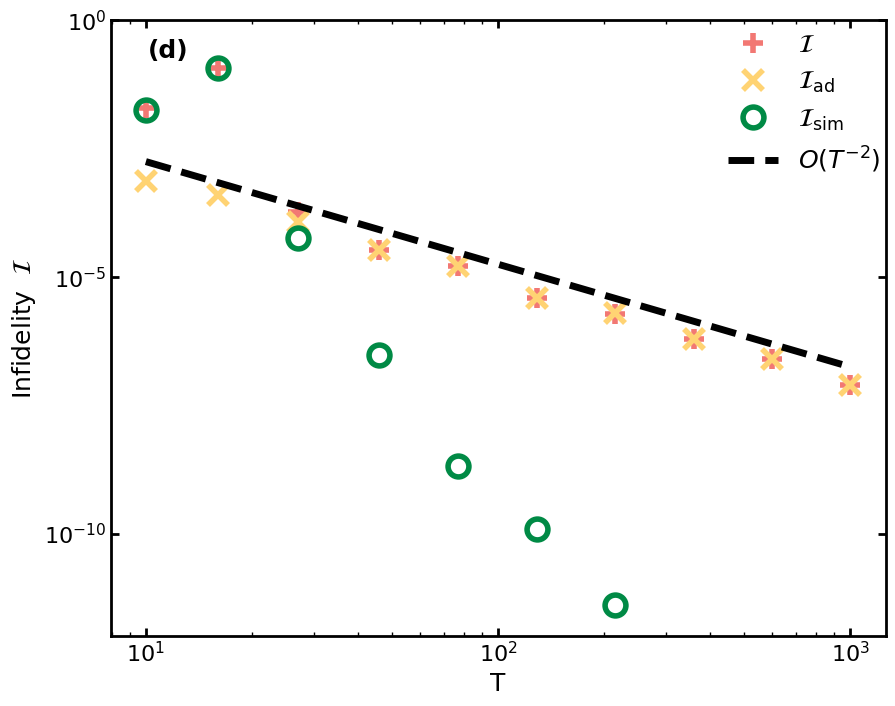

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

def plot2d(ax):

    # 存储数据
    data = [[], [], [], []]
    data_lcu = [[], [], [], []]

    # 打开并读取数据文件
    with open("Fig2d/Fig2d1.txt", "r") as file:
        for line in file:
            numbers = line.split()
            data[0].append(float(numbers[0]))
            data[1].append(float(numbers[1]))
            data[2].append((float(numbers[2])))
            data[3].append((float(numbers[3])))
    # 创建一个新的figure
    # fig, ax = plt.subplots(1, 1, figsize=(8*0.9, 6*0.9))

    # 绘图，设定颜色cmap
    colors = ["#F27873", '#FFD373', '#008A45', '#80C5A2', '#5F5F5E', '#468BCA', '#7DD2F6', '#B384BA', '#D9C2DD']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(colors))

    # 设置线的样式
    lmap = [':', '-.', '--', '-']
    # 不同的标记符号
    markers = ['+', 'x','o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H',  '|', '_']

    labels = ['$\mathcal{I}$',r'$\mathcal{I}_{\text{ad}}$',r'$\mathcal{I}_{\text{sim}}$']

    # 设置全局字体属性
    plt.rcParams['font.size'] = 18  # 设置全局字体大小
    # 设置点的大小
    l_width = 3
    p_size = 15

    # 绘制第一个子图
    for i in range(3):
        ax.plot(data[0], data[i + 1], color=cmap(i),markerfacecolor='none', marker=markers[i], markersize = p_size,markeredgewidth = 4, linestyle='-', lw=0,label=labels[i])


    a = data[3][0]
    T0 = data[0][0]
    b = 0.02
    klcu = a * T0**2/10
    kbefore = a /(np.exp(b*T0)*T0**(-2))
    Ts = np.array(data[0]) 
    before = kbefore * np.exp(b*Ts)*T0**(-2)
    lcu= klcu /Ts / Ts
    data = [Ts,lcu,before]
    labels = ['$O(T^{-2})$','$O(e^T)$']

    l_width = 5

    lmap = ['--', ':']
    # for i in range(len(labels)):
    for i in range(1):
        ax.plot(data[0], data[i + 1], color='black', linestyle=lmap[i], lw=l_width,label=labels[i])
        # ax.scatter(data[0], data[i + 1], color=cmap(i), marker=markers[0], linestyle=lmap[i], s=p_size,label=labels[i]+' for Tro')


    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([1E-12,1])
    main_ticks_y = [1E-10,1E-5,1]  # y轴主刻度位置
    ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
    # 移除y轴的副刻度
    ax.yaxis.set_minor_locator(ticker.NullLocator())
    ax.legend(frameon=False,fontsize = 18,bbox_to_anchor=(0.01, 0,1,1),  # (1, 0) 表示右下角
                        bbox_transform=ax.transAxes,
                        borderpad=0)

    ax.set_ylabel('Infidelity  $\mathcal{I}$')
    ax.set_xlabel('T')
    # ax.text(0.1, 0.97, '(a)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

    ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width = 2, length = 6)
    ax.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width = 1, length = 3)

    # 设置刻度标签的字体大小
    ax.tick_params(axis='both', which='major', labelsize=16)  # 设置主刻度标签的字体大小
    ax.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签的字体大小

   # # 添加标签
    ax.text(0.1, 0.97, '(d)', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    # 设置边框的粗细
    for a in [ax]:#, inset_ax1, inset_ax2]:
        for spine in a.spines.values():
            spine.set_linewidth(2)  # 设置边框的宽度

    # 保存图像
    plt.savefig('Fig2d/Fig2d.eps')
    # plt.show()

# 创建一个新的figure
fig, ax = plt.subplots(figsize=(10, 8))
plot2d(ax)

# Fig2e (previous Fig2b)

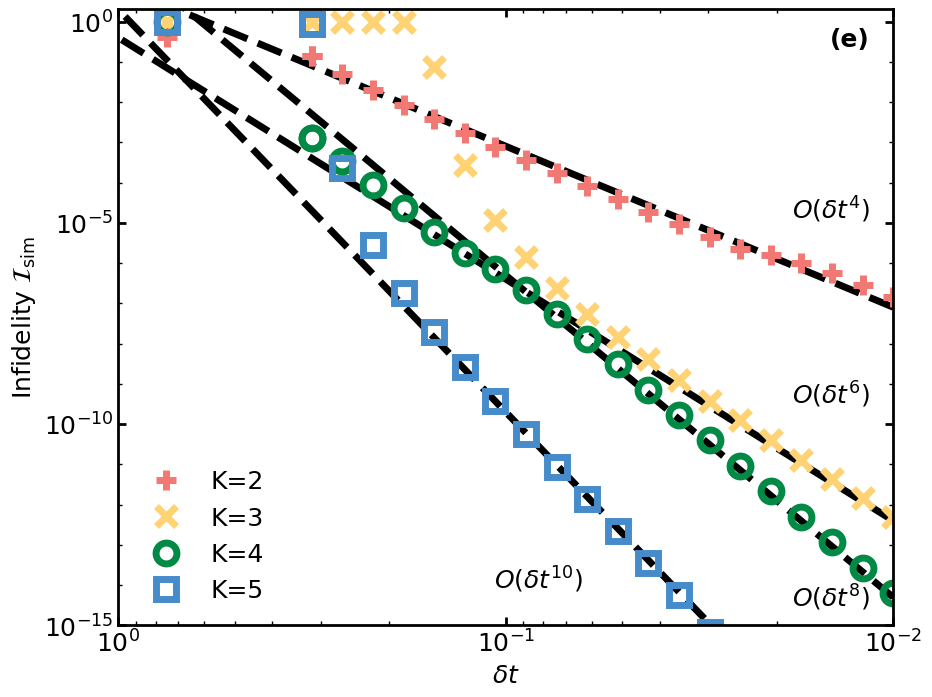

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

# 定义拟合函数，在对数空间中
def log_fit_func(log_T, a, b):
    T = np.exp(log_T)
    return np.log(a * T**2 + b * T**-2)

def plot2e(ax):
    # 存储数据
    data_dict = {}
    current_T = None
    current_n = None

    # 打开并读取数据文件
    with open("Fig2e/Fig2e.txt", "r") as file:
        for line in file:
            numbers = line.split()
            if len(numbers) == 1:  # 新的行有T和n两个字段
                method = numbers[0]
                if method not in data_dict:
                    data_dict[method] = {"T": [], "I_total": [], "I_ad": [], "I_sim": []}
            elif len(numbers) == 5 :#and current_T is not None and current_n is not None and numbers[0] == "1.0":
                data_dict[method]["T"].append(float(numbers[0]))
                data_dict[method]["I_total"].append(float(numbers[2]))
                data_dict[method]["I_ad"].append(float(numbers[3]))
                data_dict[method]["I_sim"].append(abs(float(numbers[4])))
    # 设置全局字体属性
    plt.rcParams['font.size'] = 18  # 设置全局字体大小

    # 绘图，设定颜色cmap
    colors = ["#F27873",'#FFD373','#008A45','#468BCA','#7DD2F6','#B384BA','#D9C2DD','#80C5A2']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(colors))




    # 设置点的大小
    p_size = 15
    l_size = 5

    min_values = []

    # 设置线的样式
    lmap = [':', '-.', '--', '-']
    # 不同的标记符号
    markers = ['+', 'x','o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H',  '|', '_']

    labels = ['$\mathcal{I}$',r'$\mathcal{I}_{\text{ad}}$',r'$\mathcal{I}_{\text{sim}}$']


    # a = data_dict['K=3']['I_total'][]
    # T0 = data[0][0]
    a4  = 1E-4*80000
    a6 = 0.4
    a8 =  50
    a10 = 2
    dts = np.logspace(-2,0,100) 
    y4s = a4 * dts**4
    y6s = a6 * dts**6
    y8s = a8 * dts**8
    y10s = a10 * dts**10
    data = [dts,y4s,y6s,y8s,y10s]
    labels = ['$O(T^{-4})$','$O(T^{-6})$', '$O(T^{-8})$','$O(T^{-10})$']

    l_width = 5

    for i in range(len(labels)):
        ax.plot(data[0], data[i + 1], color='black', linestyle='--', lw=l_width)
        # ax.scatter(data[0], data[i + 1], color=cmap(i), marker=markers[0], linestyle=lmap[i], s=p_size,label=labels[i]+' for Tro')

    # 进行倒序，然后绘图
    for i, method in enumerate(data_dict.keys()):
        data = data_dict[method]
        T = np.array(data["T"])
        I_total = np.array(data["I_total"])
        I_sim = np.array(data["I_sim"])
        # ax.scatter(T, I_total, color=cmap(i), s=p_size, marker=markers[i % len(markers)], label=f"{method}")
        # ax.plot(T, I_total, color=cmap(i),markerfacecolor='none', marker=markers[i], markersize = p_size,markeredgewidth = 2, linestyle='--', lw=3,label=method)
        ax.plot(T, I_sim, color=cmap(i),markerfacecolor='none', marker=markers[i], markersize = p_size,markeredgewidth = 5, linestyle='-', lw=0,label=method)

    
    ax.legend(frameon=False,fontsize = 18,bbox_to_anchor=(-1, -1,1,1),  # (1, 0) 表示右下角
                        bbox_transform=ax.transAxes,
                        borderpad=0)

    ax.legend(frameon=False,fontsize = 18,loc= 'lower left')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([1,0.01])
    ax.set_ylim([1E-15,2E0])
    main_ticks_y = [1E-15,1E-10,1E-5,1E0]  # y轴主刻度位置
    ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
    # 移除y轴的副刻度
    ax.yaxis.set_minor_locator(ticker.NullLocator())
    # 设置x轴副刻度不显示数字
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width = 2, length = 6)
    ax.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width = 1, length = 3)
    ax.set_ylabel(r'Infidelity $\mathcal{I}_{\text{sim}}$')
    ax.set_xlabel(r'$\delta t$')
    # ax[0].set_title("Trotter versus non-Trotter")
    # 设置边框的粗细
    for spine in ax.spines.values():
        spine.set_linewidth(2)  # 设置边框的宽度
    # 设置刻度标签的字体大小
    ax.tick_params(axis='both', which='major', labelsize=18)  # 设置主刻度标签的字体大小
    ax.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签的字体大小

    # main_ticks_y = [1E-12,1E-8,1E-4,1]  # y轴主刻度位置
    ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
    sub_ticks_y = np.logspace(-14,0,15)
    ax.yaxis.set_minor_locator(ticker.FixedLocator(sub_ticks_y))
    # 隐藏副刻度的标签
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())



           # # 添加标签
    x = 0.97
    ax.text(0.97, 0.97, '(e)', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    ax.text(x, 0.7, '$O(\delta t^{4})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    ax.text(x, 0.4, '$O(\delta t^{6})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    ax.text(x, 0.07, '$O(\delta t^{8})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    ax.text(0.6, 0.1, '$O(\delta t^{10})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    # 设置主刻度和副刻度
    plt.savefig('Fig2e/Fig2e.eps', bbox_inches='tight')
    # plt.savefig('linear_system/linear_system.eps')
# 创建一个新的figure
fig, ax = plt.subplots(figsize=(10, 8))
plot2e(ax)

# Fig2f (previous Fig2a)

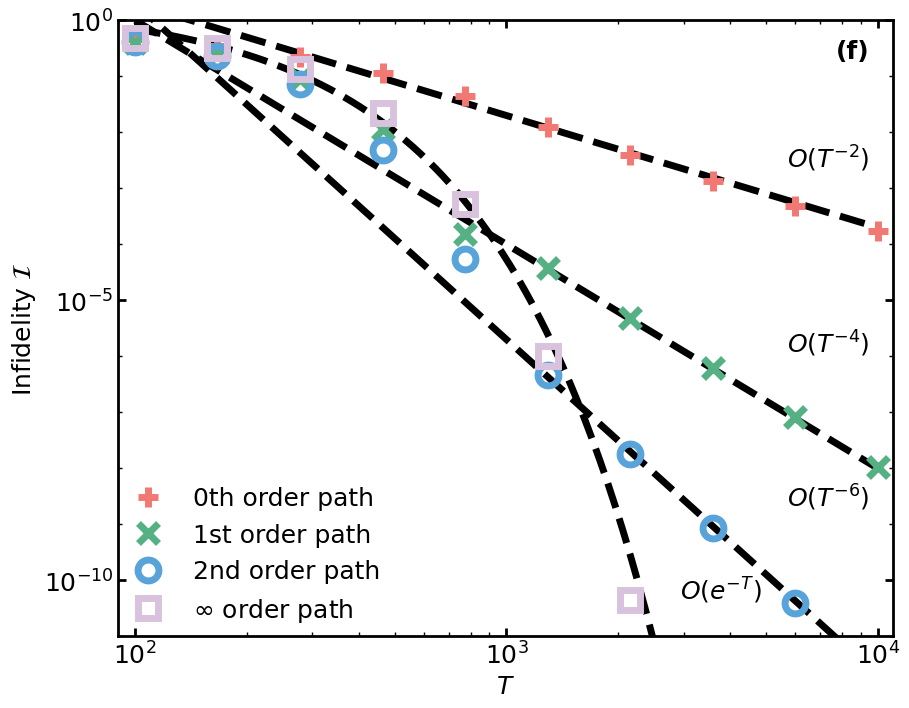

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

# 定义拟合函数，在对数空间中
def log_fit_func(log_T, a, b):
    T = np.exp(log_T)
    return np.log(a * T**2 + b * T**-2)

def plot2f(ax):

    # a = data_dict['K=3']['I_total'][]
    # T0 = data[0][0]
    co = [0,2*1E4,1*1E8,2*1E12,2]
    Ts = np.logspace(2,4,100) 
    data = [Ts] + [co[i] * Ts **(-2*i) for i in range(1,4)] + [co[4] * np.exp(-Ts/1E1/9.5)]
    labels = ['$O(T^{-2})$','$O(T^{-4})$','$O(T^{-6})$','$O(e^{-T})$']

    l_width = 5

    for i in range(len(labels)):
        ax.plot(data[0], data[i + 1], color='black', linestyle='--', lw=l_width)
        # ax.scatter(data[0], data[i + 1], color=cmap(i), marker=markers[0], linestyle=lmap[i], s=p_size,label=labels[i]+' for Tro')


    # 存储数据
    data_dict = {}
    current_T = None
    current_n = None

    # 打开并读取数据文件
    with open("Fig2f/Fig2f.txt", "r") as file:
        for line in file:
            numbers = line.split()
            if len(numbers) == 1:  # 新的行有T和n两个字段
                method = numbers[0]
                if method not in data_dict:
                    data_dict[method] = {"T": [], "I_total": [], "I_ad": [], "I_sim": []}
            elif len(numbers) == 5 :#and current_T is not None and current_n is not None and numbers[0] == "1.0":
                data_dict[method]["T"].append(float(numbers[0]))
                data_dict[method]["I_total"].append(float(numbers[2]))
                data_dict[method]["I_ad"].append(float(numbers[3]))
                data_dict[method]["I_sim"].append(abs(float(numbers[4])))

    # 设置全局字体属性
    plt.rcParams['font.size'] = 18  # 设置全局字体大小

    # 绘图，设定颜色cmap
    colors = ["#F27873",'#FFD373','#008A45','#80C5A2','#5F5F5E','#468BCA','#7DD2F6','#B384BA','#D9C2DD']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(data_dict))


    # 设置点的大小
    p_size = 15
    l_size = 5

    min_values = []

    # 设置线的样式
    lmap = [':', '-.', '--', '-']
    # 不同的标记符号
    markers = ['+', 'x','o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H',  '|', '_']

    labels = ['0th order path','1st order path','2nd order path','$\infty$ order path']
    # 进行倒序，然后绘图
    for i, method in enumerate(data_dict.keys()):
        data = data_dict[method]
        T = np.array(data["T"])
        I_ad = np.array(data["I_total"])
        # ax.scatter(T, I_total, color=cmap(i), s=p_size, marker=markers[i % len(markers)], label=f"{method}")
        ax.plot(T, I_ad, color=cmap(i),markerfacecolor='none', marker=markers[i], markersize = p_size,markeredgewidth = 5, linestyle='-', lw=0,label=labels[i])




    
    ax.legend(frameon=False,fontsize = 18,bbox_to_anchor=(-0.01, 0,1,1),  # (1, 0) 表示右下角
                        bbox_transform=ax.transAxes,
                        borderpad=0)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([1E-11,1])
    ax.set_xlim([90,11000])
    main_ticks_y = [1E-10,1E-5,1]  # y轴主刻度位置
    ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
    # 移除y轴的副刻度
    ax.yaxis.set_minor_locator(ticker.NullLocator())
    ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width = 2, length = 6)
    ax.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width = 1, length = 3)
    ax.set_ylabel('Infidelity $\mathcal{I}$')
    ax.set_xlabel('$T$')
    # ax[0].set_title("Trotter versus non-Trotter")
    # 设置边框的粗细
    for spine in ax.spines.values():
        spine.set_linewidth(2)  # 设置边框的宽度
    # 设置刻度标签的字体大小
    ax.tick_params(axis='both', which='major', labelsize=18)  # 设置主刻度标签的字体大小
    ax.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签的字体大小

    # main_ticks_y = [1E-12,1E-8,1E-4,1]  # y轴主刻度位置
    ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
    sub_ticks_y = np.logspace(-14,0,15)
    ax.yaxis.set_minor_locator(ticker.FixedLocator(sub_ticks_y))
    # 隐藏副刻度的标签
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())


       # # 添加标签
    ax.text(0.97, 0.97, '(f)', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    ax.text(0.97, 0.8, '$O(T^{-2})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    ax.text(0.97, 0.5, '$O(T^{-4})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    ax.text(0.97, 0.25, '$O(T^{-6})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    ax.text(0.83, 0.1, '$O(e^{-T})$', transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

    # 设置主刻度和副刻度
    plt.savefig('Fig2f/Fig2f.eps', bbox_inches='tight')
    # plt.savefig('linear_system/linear_system.eps')

# 创建一个新的figure
fig, ax = plt.subplots(figsize=(10, 8))
plot2f(ax)

In [32]:
1-8.704148513061227e-14

0.999999999999913

In [33]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.interpolate import interp1d
# from matplotlib.colors import LinearSegmentedColormap
# import matplotlib.ticker as ticker

# def plot1e(ax):

#     # 存储数据
#     data = [[], [], [], []]
#     data_lcu = [[], [], [], []]

#     # 打开并读取数据文件
#     with open("Fig1e/Fig1e.txt", "r") as file:
#         for line in file:
#             numbers = line.split()
#             data[0].append(float(numbers[0]))
#             data[1].append(float(numbers[1]))
#             data[2].append((float(numbers[2])))
#             data[3].append((float(numbers[3])))
#     # 创建一个新的figure
#     # fig, ax = plt.subplots(1, 1, figsize=(8*0.9, 6*0.9))

#     # 绘图，设定颜色cmap
#     colors = ["#F27873", '#FFD373', '#008A45', '#80C5A2', '#5F5F5E', '#468BCA', '#7DD2F6', '#B384BA', '#D9C2DD']
#     cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(colors))

#     # 设置线的样式
#     lmap = [':', '-.', '--', '-']
#     # 不同的标记符号
#     markers = ['+', 'x','o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H',  '|', '_']

#     labels = ['$\mathcal{I}$',r'$\mathcal{I}_{\text{ad}}$',r'$\mathcal{I}_{\text{sim}}$']

#     # 设置全局字体属性
#     plt.rcParams['font.size'] = 18  # 设置全局字体大小
#     # 设置点的大小
#     l_width = 3
#     p_size = 13

#     # 绘制第一个子图
#     for i in range(3):
#         ax.plot(data[0], data[i + 1], color=cmap(i),markerfacecolor='none', marker=markers[i], markersize = p_size,markeredgewidth = 4, linestyle='-', lw=0,label=labels[i])


#     a = data[3][0]
#     T0 = data[0][0]
#     b = 0.02
#     klcu = a * T0**2
#     kbefore = a /(np.exp(b*T0)*T0**(-2))
#     Ts = np.array(data[0]) 
#     before = kbefore * np.exp(b*Ts)*Ts**(-2)
#     lcu= klcu /Ts / Ts
#     data = [Ts,lcu,before]
#     labels = ['$O(T^{-2})$','$O(T^{-2}e^T)$']

#     l_width = 5

#     for i in range(len(labels)):
#         ax.plot(data[0], data[i + 1], color='black', linestyle=lmap[i], lw=l_width,label=labels[i])
#         # ax.scatter(data[0], data[i + 1], color=cmap(i), marker=markers[0], linestyle=lmap[i], s=p_size,label=labels[i]+' for Tro')


#     ax.set_yscale('log')
#     ax.set_xscale('log')
#     ax.set_ylim([1E-9,1])
#     main_ticks_y = [1E-9,1E-6,1E-3,1]  # y轴主刻度位置
#     ax.yaxis.set_major_locator(ticker.FixedLocator(main_ticks_y))
#     # 移除y轴的副刻度
#     ax.yaxis.set_minor_locator(ticker.NullLocator())
#     ax.legend(frameon=False,fontsize = 18,bbox_to_anchor=(0.01, 0,1,1),  # (1, 0) 表示右下角
#                         bbox_transform=ax.transAxes,
#                         borderpad=0)

#     ax.set_ylabel('Infidelity  $\mathcal{I}$')
#     ax.set_xlabel('T')
#     # ax.text(0.1, 0.97, '(a)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

#     ax.tick_params(axis="both", direction="in", which="major", top=True, right=True, width = 2, length = 6)
#     ax.tick_params(axis="both", direction="in", which="minor", top=True, right=True, width = 1, length = 3)

#     # 设置刻度标签的字体大小
#     ax.tick_params(axis='both', which='major', labelsize=16)  # 设置主刻度标签的字体大小
#     ax.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签的字体大小


#     # 设置边框的粗细
#     for a in [ax]:#, inset_ax1, inset_ax2]:
#         for spine in a.spines.values():
#             spine.set_linewidth(2)  # 设置边框的宽度

#     # 保存图像
#     plt.savefig('Fig1e/Fig1e.eps')
#     # plt.show()

# # # 创建一个新的figure
# # fig, ax = plt.subplots(figsize=(10, 8))
# # plot1e(ax)

# Merge Fig2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


斜率: 1.90


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


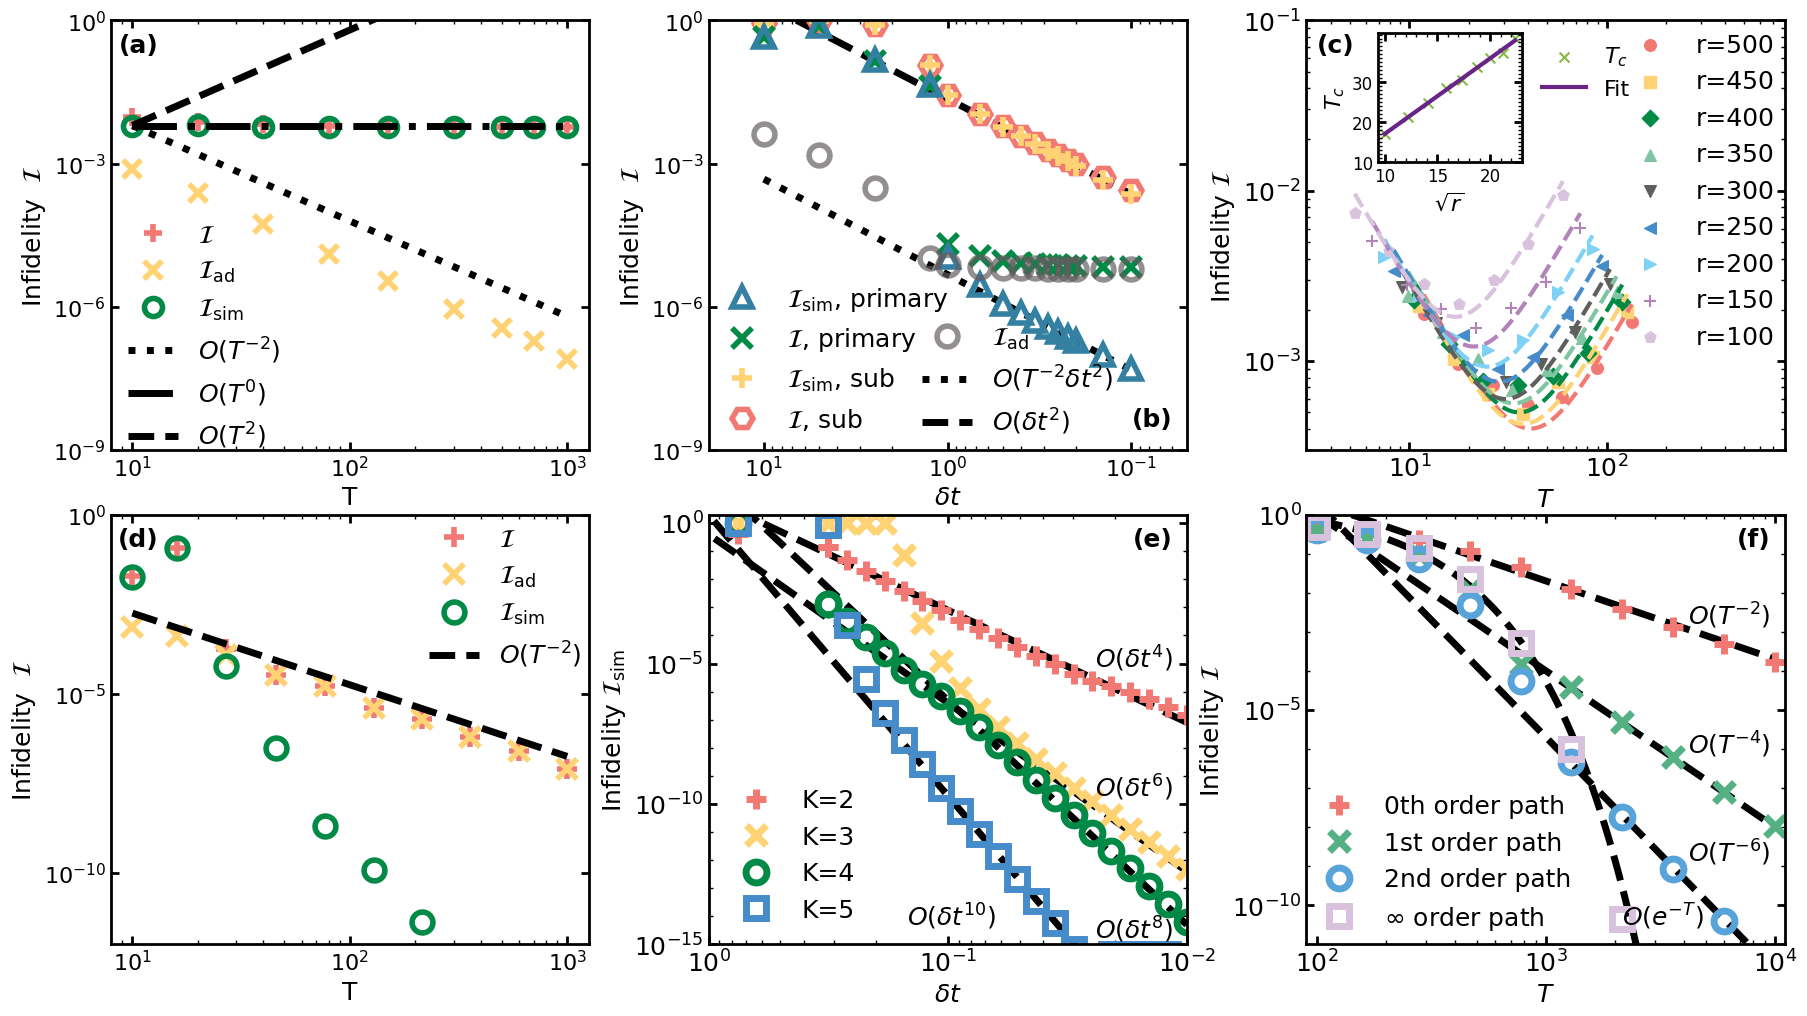

In [34]:
r = 1.2
# 创建一个2x3的子图大图
fig, axs = plt.subplots(2, 3, figsize=(18*r, 10*r))
# 调用每个绘图函数
plot2a(axs[0, 0])
plot2b(axs[0, 1])
plot2c(axs[0, 2])
plot2d(axs[1, 0])
plot2e(axs[1, 1])
plot2f(axs[1, 2])
# 调整子图之间的间距
plt.subplots_adjust(wspace=0.25, hspace=0.15)
plt.savefig('Fig2/Fig2.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
# 显示拼接后的大图
plt.show()